In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.datasets import load_breast_cancer
from knn import KNN


Load the dataset with scikit-learn.


In [2]:
breast_cancer = load_breast_cancer()

Split dataset to train and test datasets (%80 for train and %20 for test).


In [3]:
X = breast_cancer.data
Y = breast_cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Implement and fit your object oriented KNN algorithm on the train dataset.


In [6]:
knn = KNN(5)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

Evaluate your KNN algorithm on the test dataset with different values of k = 3, 5, 7, ...


In [7]:
K =[3,5,7,9,11]
accuracy=[]
for k in K:
    knn = KNN(K=k)
    knn.fit(np.array(X_train), np.array(Y_train))
    accuracy.append(knn.evaluate(np.array(X_test), np.array(Y_test)))

In [9]:
print(accuracy)

[0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088]


In [8]:
K =[3,5,7,9,11]
accuracy_skl=[]
for k in K:
    knn_skl = KNeighborsClassifier(n_neighbors=k)
    knn_skl.fit(X_train, Y_train)
    accuracy_skl.append(knn_skl.score(X_test, Y_test))

In [10]:
print(accuracy_skl)

[0.9035087719298246, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088]



Calculate confusion matrix for test dataset (2x2).

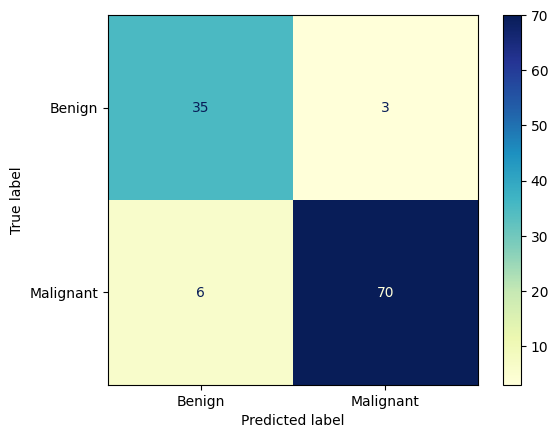

In [13]:
confusion_matrix = metrics.confusion_matrix(Y_pred, Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Benign','Malignant'])

cm_display.plot(cmap='YlGnBu')
plt.savefig('Outputs/breast_cancer_cm.png')
plt.show()